# SpotiPy 
## Top 100 streamed songs on Spotify from 2010 to 2019
### What music metrics set these songs apart from the rest.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import requests
import json
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 


In [2]:
# Load the CSV file from Kaggle into Pandas DataFrame
top_songs = pd.read_csv("Resources/10years_top10s.csv")


## Step 1: Filter the above dataframe for years 2010 - 2014

In [3]:
top_songs = pd.read_csv("Resources/10years_top10s.csv")

# Rename columns.  
top_songs = top_songs.rename(columns={'title': 'Title', 'artist': 'Artist', 'top genre': 'Genre', 'year': 'Year', 'bpm': 'BPM', 'nrgy': 'Energy', 'dnce': 'Dance', 'dB': 'Decibels (dB)', 'live': 'Live', 'val': 'Valence', 'dur': 'Duration', 'acous': 'Acousticness', 'spch': 'Speechiness', 'pop': 'Popularity'})

# Filter the data for the years 2010 through 2014
five_year_data = top_songs[top_songs['Year'].isin([2010, 2011, 2012, 2013, 2014])]


In [4]:
# Clean grouped_data removing any columns that are too out of range to be useful.
top_songs.drop(['Live', 'Valence', 'Acousticness', 'Energy'], axis=1)


Unnamed: 0                                              Title  \
0             1                                   Hey, Soul Sister   
1             2                               Love The Way You Lie   
2             3                                            TiK ToK   
3             4                                        Bad Romance   
4             5                               Just the Way You Are   
..          ...                                                ...   
598         599                Find U Again (feat. Camila Cabello)   
599         600      Cross Me (feat. Chance the Rapper & PnB Rock)   
600         601  No Brainer (feat. Justin Bieber, Chance the Ra...   
601         602    Nothing Breaks Like a Heart (feat. Miley Cyrus)   
602         603                                   Kills You Slowly   

               Artist            Genre  Year  BPM  Dance  Decibels (dB)  \
0               Train       neo mellow  2010   97     67             -4   
1              Eminem  detroit hip hop  2010   87     75             -5   
2               Kesha        dance pop  2010  120     76             -3   
3           Lady Gaga        dance pop  2010  119     70             -4   
4          Bruno Mars              pop  2010  109     64             -5   
..                ...              ...   ...  ...    ...            ...   
598       Mark Ronson        dance pop  2019  104     61             -7   
599        Ed Sheeran              pop  2019   95     75             -6   
600         DJ Khaled        dance pop  2019  136     53             -5   
601       Mark Ronson        dance pop  2019  114     60             -6   
602  The Chainsmokers       electropop  2019  150     70             -9   

     Duration  Speechiness  Popularity  
0         217            4          83  
1         263           23          82  
2         200           14          80  
3         295            4          79  
4         221            4          78  
..        ...          ...         ...  
598       176            3          75  
599       206           12          75  
600       260           34          70  
601       217            7          69  
602       213            6          67  

[603 rows x 11 columns]

## Step 2: Create a bar graph and pie charts for the music metrics analyzed for the top genre.

### Bar Graph for Top Genres in 2010-2014:

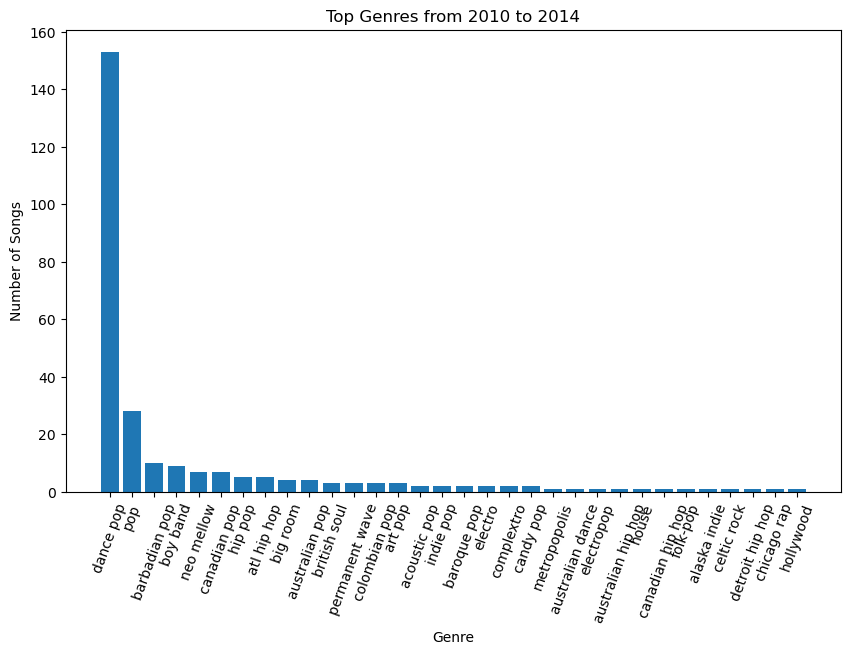

In [5]:
# Filter the data for year 2010
top_genres = five_year_data[(five_year_data['Year'] >= 2010 ) & (five_year_data['Year'] <= 2014)]

# Get the value counts for the 'top genre' column
genre_counts = top_genres['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres from 2010 to 2014')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=70)

plt.show()

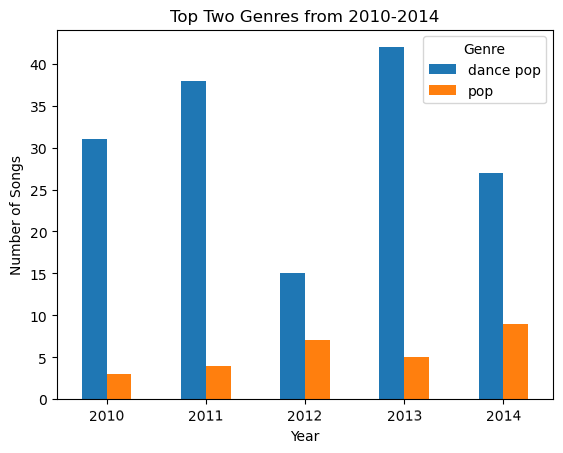

In [6]:
# Filter data for the top genres for years 2010 to 2014
filtered_data = five_year_data[(five_year_data['Genre'].isin(['dance pop', 'pop'])) & (five_year_data['Year'].isin([2010, 2011, 2012, 2013, 2014]))]

# Group data by year and genre, and calculate the count
grouped_data = filtered_data.groupby(['Year', 'Genre']).size().unstack()

# Create bar plot
grouped_data.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Top Two Genres from 2010-2014')
plt.xticks(rotation=True)
# Set legend
plt.legend(title='Genre')

# Show plot
plt.show()




## Analyzing music metrics for the top genres from 2010 - 2014: 
### BPM metric for top genres 'Dance Pop', and 'Pop'. 

C:\Users\DAlfo\AppData\Local\Temp\ipykernel_1772\1609106517.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_ten_genres = top_ten_genres.append(mean_bpm_per_genre.loc[['dance pop', 'pop']])  # Append 'dance pop' and 'pop'


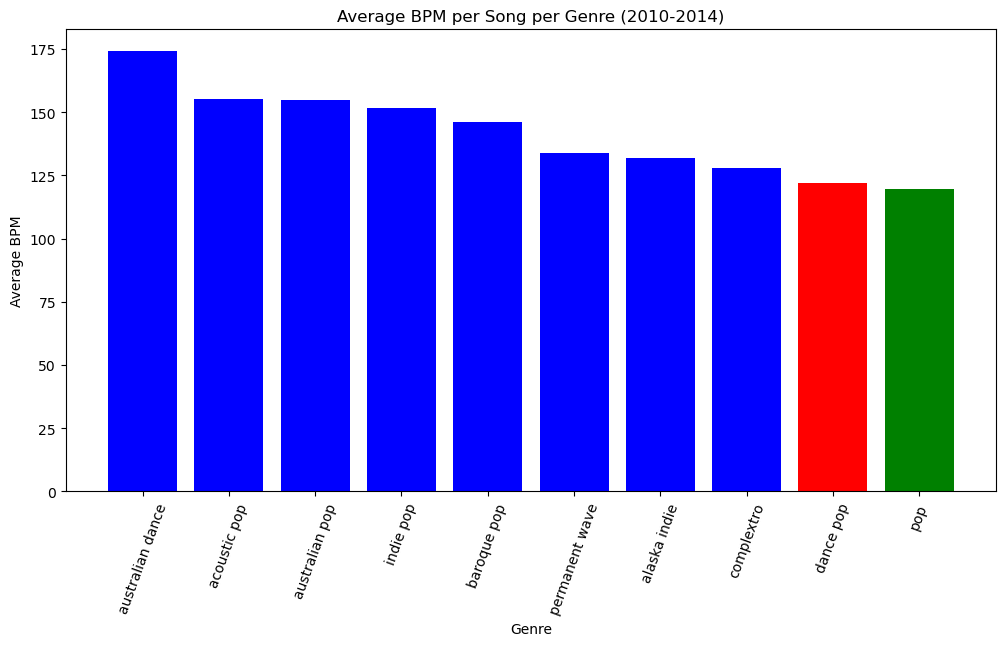

In [17]:
# Calculate mean BPM per genre
mean_bpm_per_genre = five_year_data.groupby('Genre')['BPM'].mean()

# Select top ten genres, including 'dance pop' and 'pop'
top_ten_genres = mean_bpm_per_genre.nlargest(8)  # Select top 8 genres
top_ten_genres = top_ten_genres.append(mean_bpm_per_genre.loc[['dance pop', 'pop']])  # Append 'dance pop' and 'pop'

# Create a list of colors for the bar chart
colors = ['b'] * 8  # Blue color for the first 8 genres
colors += ['r', 'g']  # Red color for 'dance pop' and green color for 'pop'

# Create bar graph for BPM per genre
plt.figure(figsize=(12, 6))
plt.bar(top_ten_genres.index, top_ten_genres.values, color=colors)
plt.xlabel('Genre')
plt.ylabel('Average BPM')
plt.title('Average BPM per Song per Genre (2010-2014)')
plt.xticks(rotation=70)
plt.show()



C:\Users\DAlfo\AppData\Local\Temp\ipykernel_1772\3442539153.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_ten_genres = top_ten_genres.append(mean_energy_per_genre.loc[['dance pop', 'pop']])  # Append 'dance pop' and 'pop'


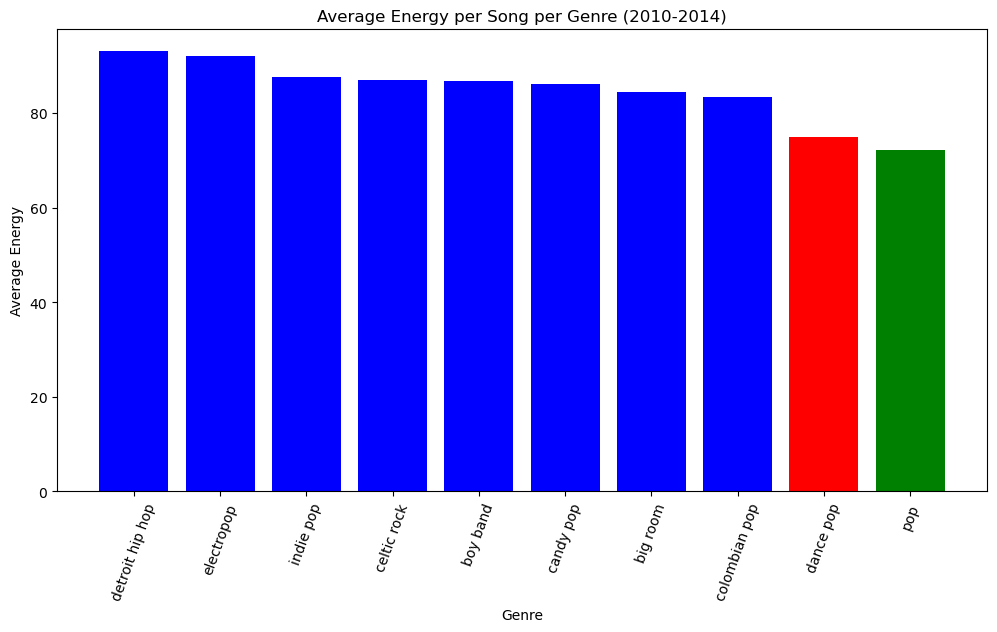

In [22]:
# Calculate mean Energy per genre
mean_energy_per_genre = five_year_data.groupby('Genre')['Energy'].mean()

# Select top ten genres, including 'dance pop' and 'pop'
top_ten_genres = mean_energy_per_genre.nlargest(8)  # Select top 8 genres
top_ten_genres = top_ten_genres.append(mean_energy_per_genre.loc[['dance pop', 'pop']])  # Append 'dance pop' and 'pop'

# Create a list of colors for the bar chart
colors = ['b'] * 8  # Blue color for the first 8 genres
colors += ['r', 'g']  # Red color for 'dance pop' and green color for 'pop'

# Create bar graph for Energy per genre
plt.figure(figsize=(12, 6))
plt.bar(top_ten_genres.index, top_ten_genres.values, color=colors)
plt.xlabel('Genre')
plt.ylabel('Average Energy')
plt.title('Average Energy per Song per Genre (2010-2014)')
plt.xticks(rotation=70)
plt.show()




C:\Users\DAlfo\AppData\Local\Temp\ipykernel_1772\2668987249.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_ten_genres = top_ten_genres.append(mean_decibels_per_genre.loc[['dance pop', 'pop']])  # Append 'dance pop' and 'pop'


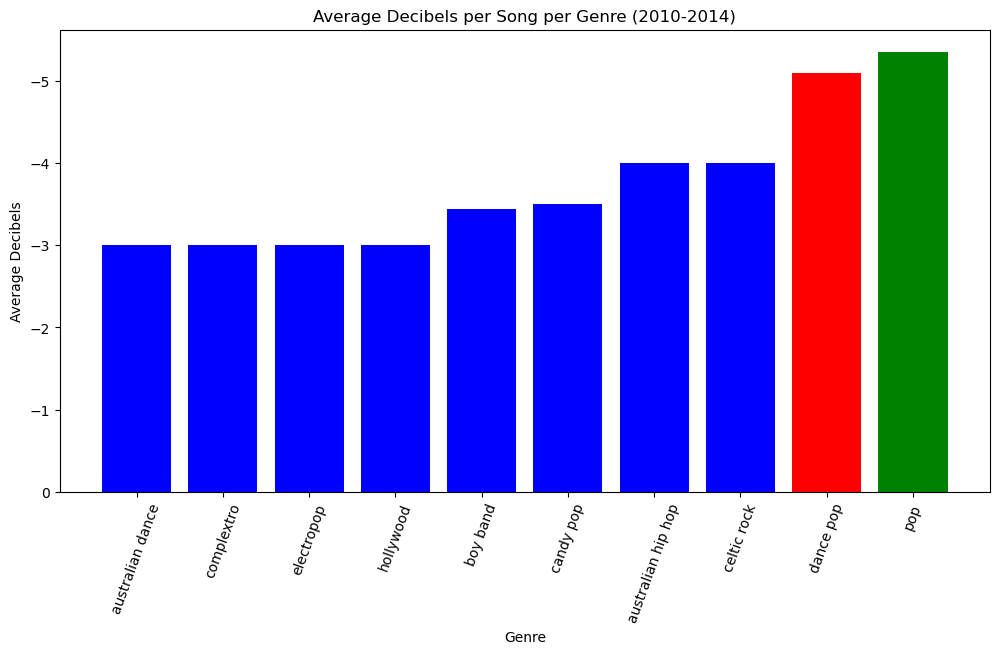

In [21]:
# Calculate mean Decibels per genre
mean_decibels_per_genre = five_year_data.groupby('Genre')['Decibels (dB)'].mean()

# Select top ten genres, including 'dance pop' and 'pop'
top_ten_genres = mean_decibels_per_genre.nlargest(8)  # Select top 8 genres
top_ten_genres = top_ten_genres.append(mean_decibels_per_genre.loc[['dance pop', 'pop']])  # Append 'dance pop' and 'pop'

# Create a list of colors for the bar chart
colors = ['b'] * 8  # Blue color for the first 8 genres
colors += ['r', 'g']  # Red color for 'dance pop' and green color for 'pop'

# Create bar graph for Decibels per genre
plt.figure(figsize=(12, 6))
plt.bar(top_ten_genres.index, top_ten_genres.values, color=colors)
plt.xlabel('Genre')
plt.ylabel('Average Decibels')
plt.title('Average Decibels per Song per Genre (2010-2014)')
plt.xticks(rotation=70)
plt.gca().invert_yaxis()
plt.show()



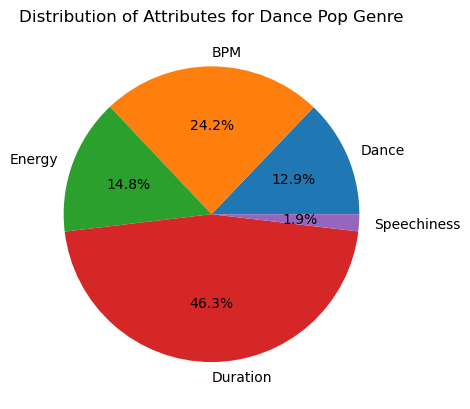

In [23]:
# Filter data for 'dance pop' genre
dance_pop_data = filtered_data[filtered_data['Genre'] == 'dance pop']

# Calculate the sum of 'Dance', 'BPM', 'Duration', and 'Speechiness' columns
sum_values = dance_pop_data[['Dance', 'BPM', 'Energy', 'Duration', 'Speechiness']].sum()

# Create a pie chart
labels = ['Dance', 'BPM', 'Energy', 'Duration', 'Speechiness']
plt.pie(sum_values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Attributes for Dance Pop Genre')

# Display the chart
plt.show()


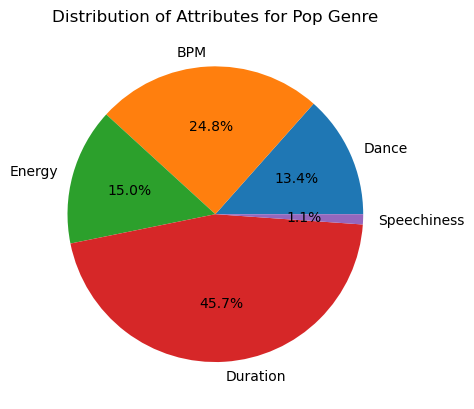

In [24]:
# Filter data for 'pop' genre
pop_data = five_year_data[five_year_data['Genre'] == 'pop']

# Calculate the sum of 'Dance', 'BPM', 'Duration', and 'Speechiness' columns and replace NaN with zeros
sum_values = pop_data[['Dance', 'BPM', 'Energy', 'Duration', 'Speechiness']].sum().fillna(0)

# Replace NaN values with 0
sum_values = np.nan_to_num(sum_values, nan=0)

# Create a pie chart
labels = ['Dance', 'BPM', 'Energy', 'Duration', 'Speechiness']
plt.pie(sum_values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Attributes for Pop Genre')

# Display the chart
plt.show()

